In [1]:
import open3d as o3d
import numpy as np
import os
import sys

# monkey patches visualization and provides helpers to load geometries
sys.path.append('..')
import open3d_tutorial as o3dtut
# change to True if you want to interact with the visualization windows
o3dtut.interactive = not "CI" in os.environ

# Visualization
## Function draw_geometries
Open3D provides a convenient visualization function `draw_geometries` which takes a list of geometry objects (`PointCloud`, `TriangleMesh`, or `Image`), and renders them together. We have implemented many functions in the visualizer, such as rotation, translation, and scaling via mouse operations, changing rendering style, and screen capture. Press `H` inside the window to print out a comprehensive list of functions.

Load a ply point cloud, print it, and render it


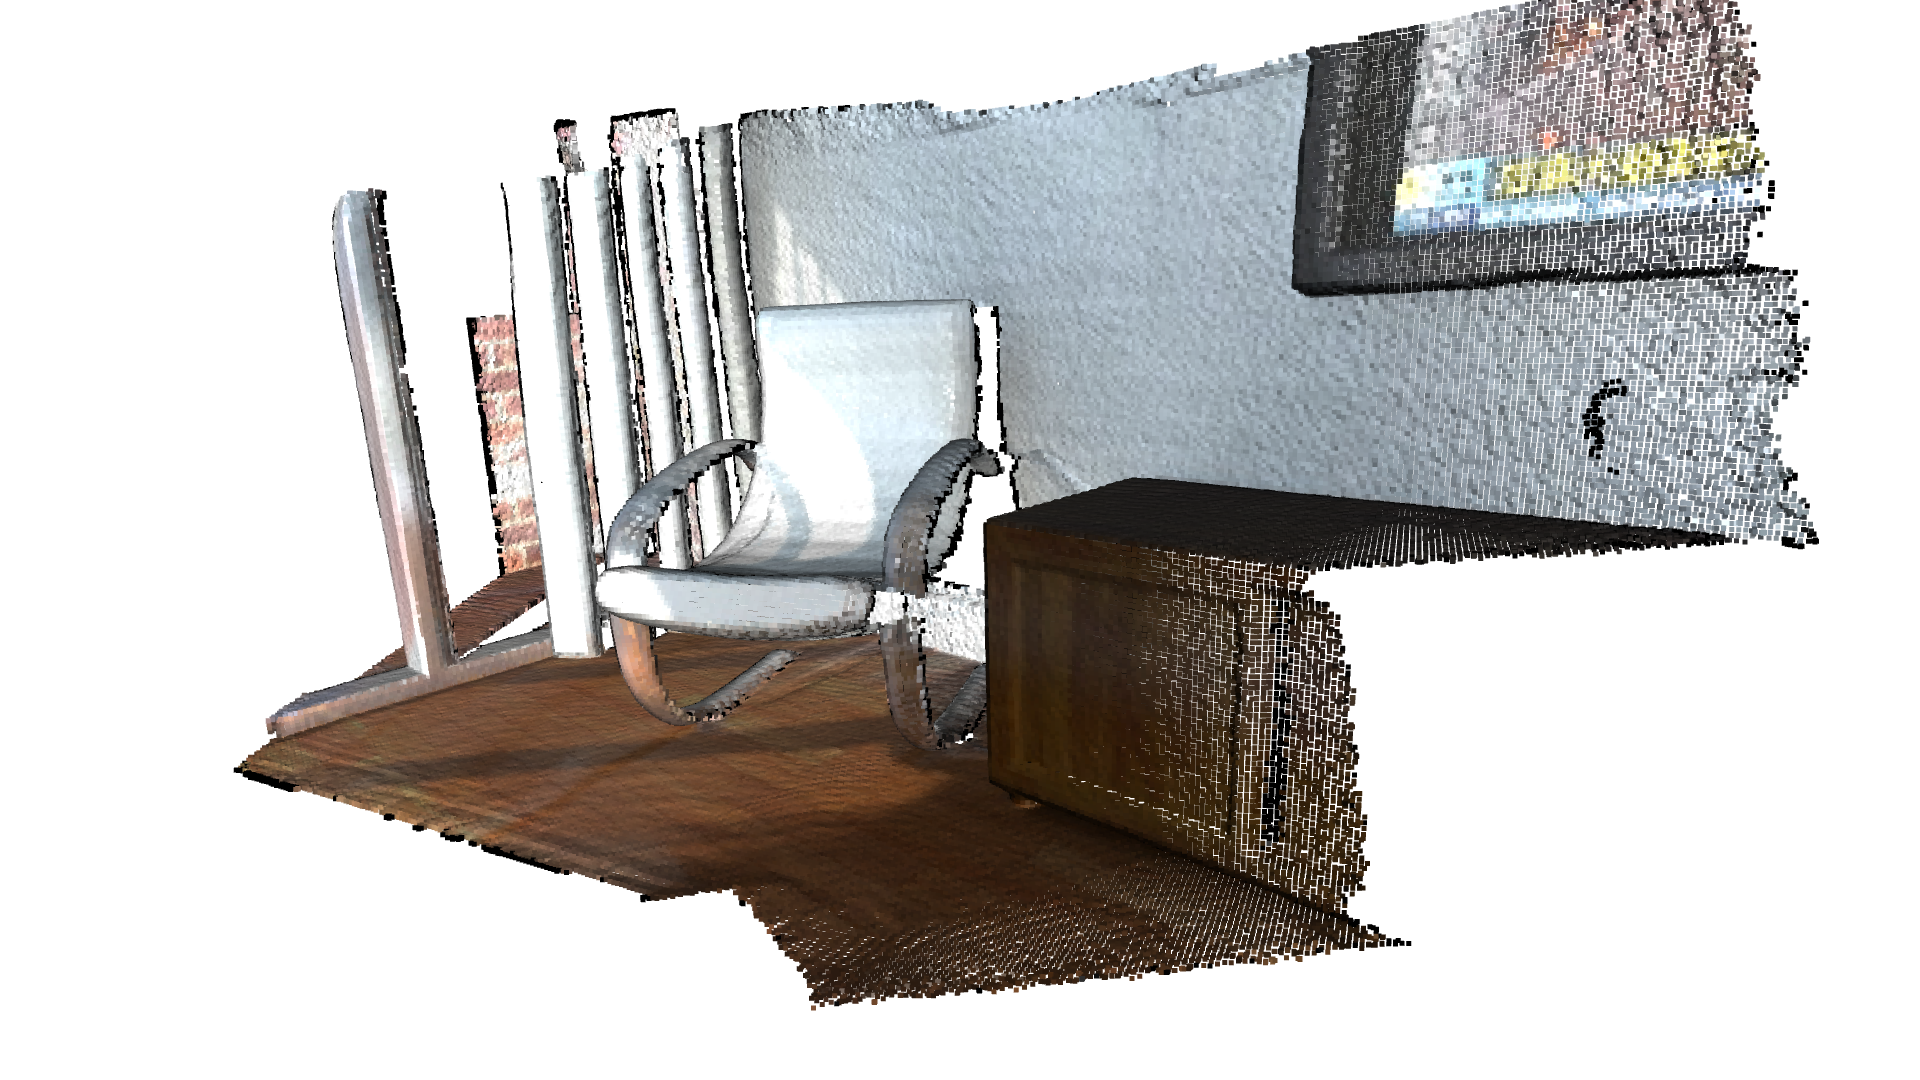

In [2]:
print("Load a ply point cloud, print it, and render it")
pcd = o3d.io.read_point_cloud(o3dtut.get_data_path_common("fragment.ply"))
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

```
-- Mouse view control --
  Left button + drag         : Rotate.
  Ctrl + left button + drag  : Translate.
  Wheel button + drag        : Translate.
  Shift + left button + drag : Roll.
  Wheel                      : Zoom in/out.

-- Keyboard view control --
  [/]          : Increase/decrease field of view.
  R            : Reset view point.
  Ctrl/Cmd + C : Copy current view status into the clipboard.
  Ctrl/Cmd + V : Paste view status from clipboard.

-- General control --
  Q, Esc       : Exit window.
  H            : Print help message.
  P, PrtScn    : Take a screen capture.
  D            : Take a depth capture.
  O            : Take a capture of current rendering settings.
```

<div class="alert alert-info">
    
**Note:** 

In some operating systems (e.g., macOS), the visualization window may not respond to keyboard input. This is usually because the console retains the input focus instead of passing it to the visualization window. Running with `pythonw` instead of `python` will resolve this issue.

</div>

<div class="alert alert-info">
    
**Note:** 

In addition to `draw_geometries`, Open3D has a set of sibling functions with more advanced functionality. `draw_geometries_with_custom_animation` allows the programmer to define a custom view trajectory and play an animation in the GUI. `draw_geometries_with_animation_callback` and `draw_geometries_with_key_callback` accept Python callback functions as input. The callback function is called in an automatic animation loop, or upon a key press event. See [Customized visualization](../visualization/customized_visualization.rst) for details.

</div>

## Store view point
In the beginning, the point cloud is rendered upside down.

![bad view](../../_static/visualization/visualization/badview.png)

After adjusting view points using `left-click + drag`, we can reach a better view point.

![color view](../../_static/visualization/visualization/color.png)

To retain this view point, press `Ctrl + C`. The view point will be translated into a json string stored in clipboard. When you move the camera to a different view, such as:

![new view](../../_static/visualization/visualization/newview.png)

You can get back to the original view by pressing `Ctrl + V`.

![color view](../../_static/visualization/visualization/color.png)

## Rendering styles
Open3D `Visualizer` supports several rendering styles. For example, pressing `L` will switch between a Phong lighting and a simple color rendering. Pressing `2` shows points colored based on their x-coordinate.

![colormap jet](../../_static/visualization/visualization/colormap_jet.png)

The color map can also be adjusted by, for example, pressing `Shift + 4`. This changes jet color map to hot color map.

![colormap hot](../../_static/visualization/visualization/colormap_hot.png)

## Geometry primitives
The code below generates a box, a sphere, and a cylinder using `create_box`, `create_sphere`, and `create_cylinder`. The box is painted in red, the sphere is painted in blue, and the cylinder is painted in green. Normals are computed for all meshes to support Phong shading (see [Visualize 3D mesh](mesh.ipynb#visualize-a-3d-mesh) and [Surface normal estimation](mesh.ipynb#surface-normal-estimation)). We can even create a coordinate axis using `create_mesh_coordinate_frame`, with its origin point set at (-2, -2, -2).

In [3]:
print("Let's define some primitives")
mesh_box = o3d.geometry.TriangleMesh.create_box(width=1.0,
                                                height=1.0,
                                                depth=1.0)
mesh_box.compute_vertex_normals()
mesh_box.paint_uniform_color([0.9, 0.1, 0.1])
mesh_sphere = o3d.geometry.TriangleMesh.create_sphere(radius=1.0)
mesh_sphere.compute_vertex_normals()
mesh_sphere.paint_uniform_color([0.1, 0.1, 0.7])
mesh_cylinder = o3d.geometry.TriangleMesh.create_cylinder(radius=0.3,
                                                          height=4.0)
mesh_cylinder.compute_vertex_normals()
mesh_cylinder.paint_uniform_color([0.1, 0.9, 0.1])
mesh_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(
    size=0.6, origin=[-2, -2, -2])

Let's define some primitives


`draw_geometries` takes a list of geometries and renders them all together. Alternatively, `TriangleMesh` supports a + operator to combine multiple meshes into one. We recommend the first approach since it supports a combination of different geometries (e.g., a mesh can be rendered in tandem with a point cloud).

We draw a few primitives using collection.


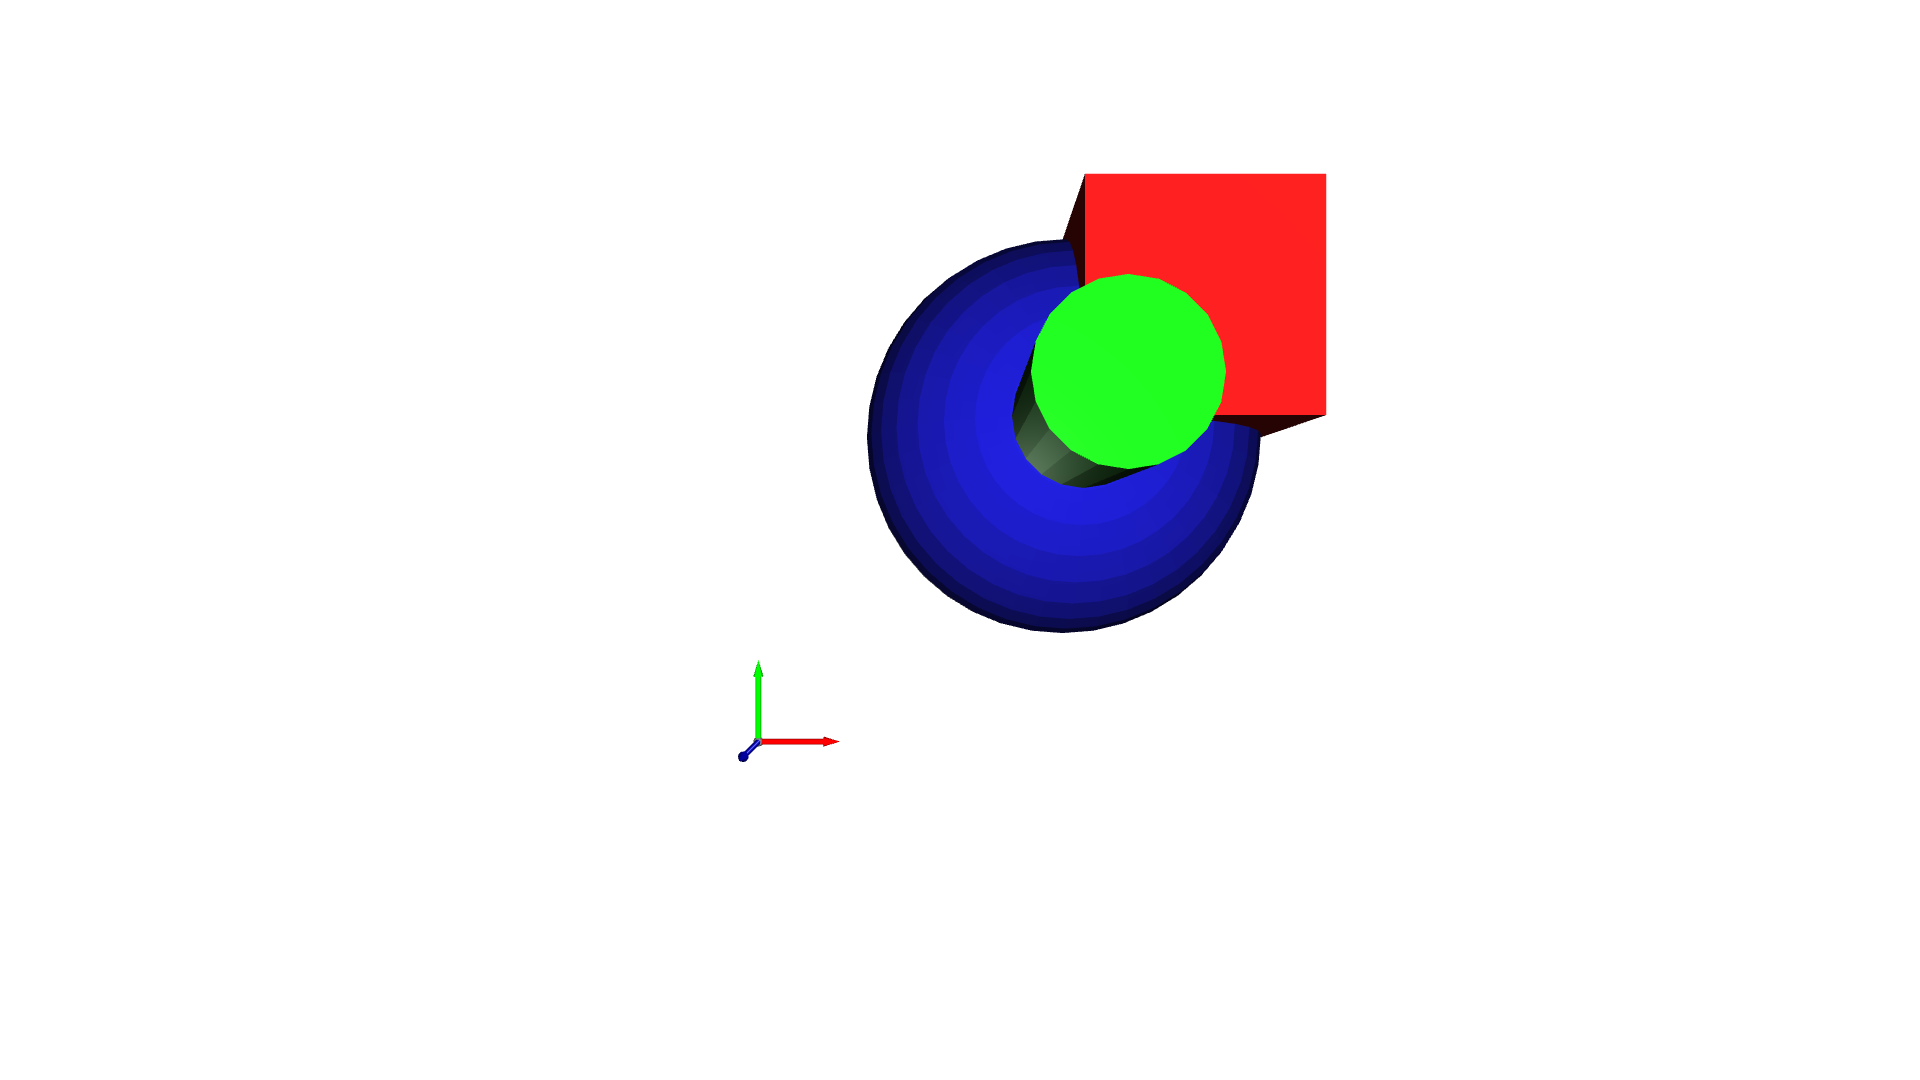

We draw a few primitives using + operator of mesh.


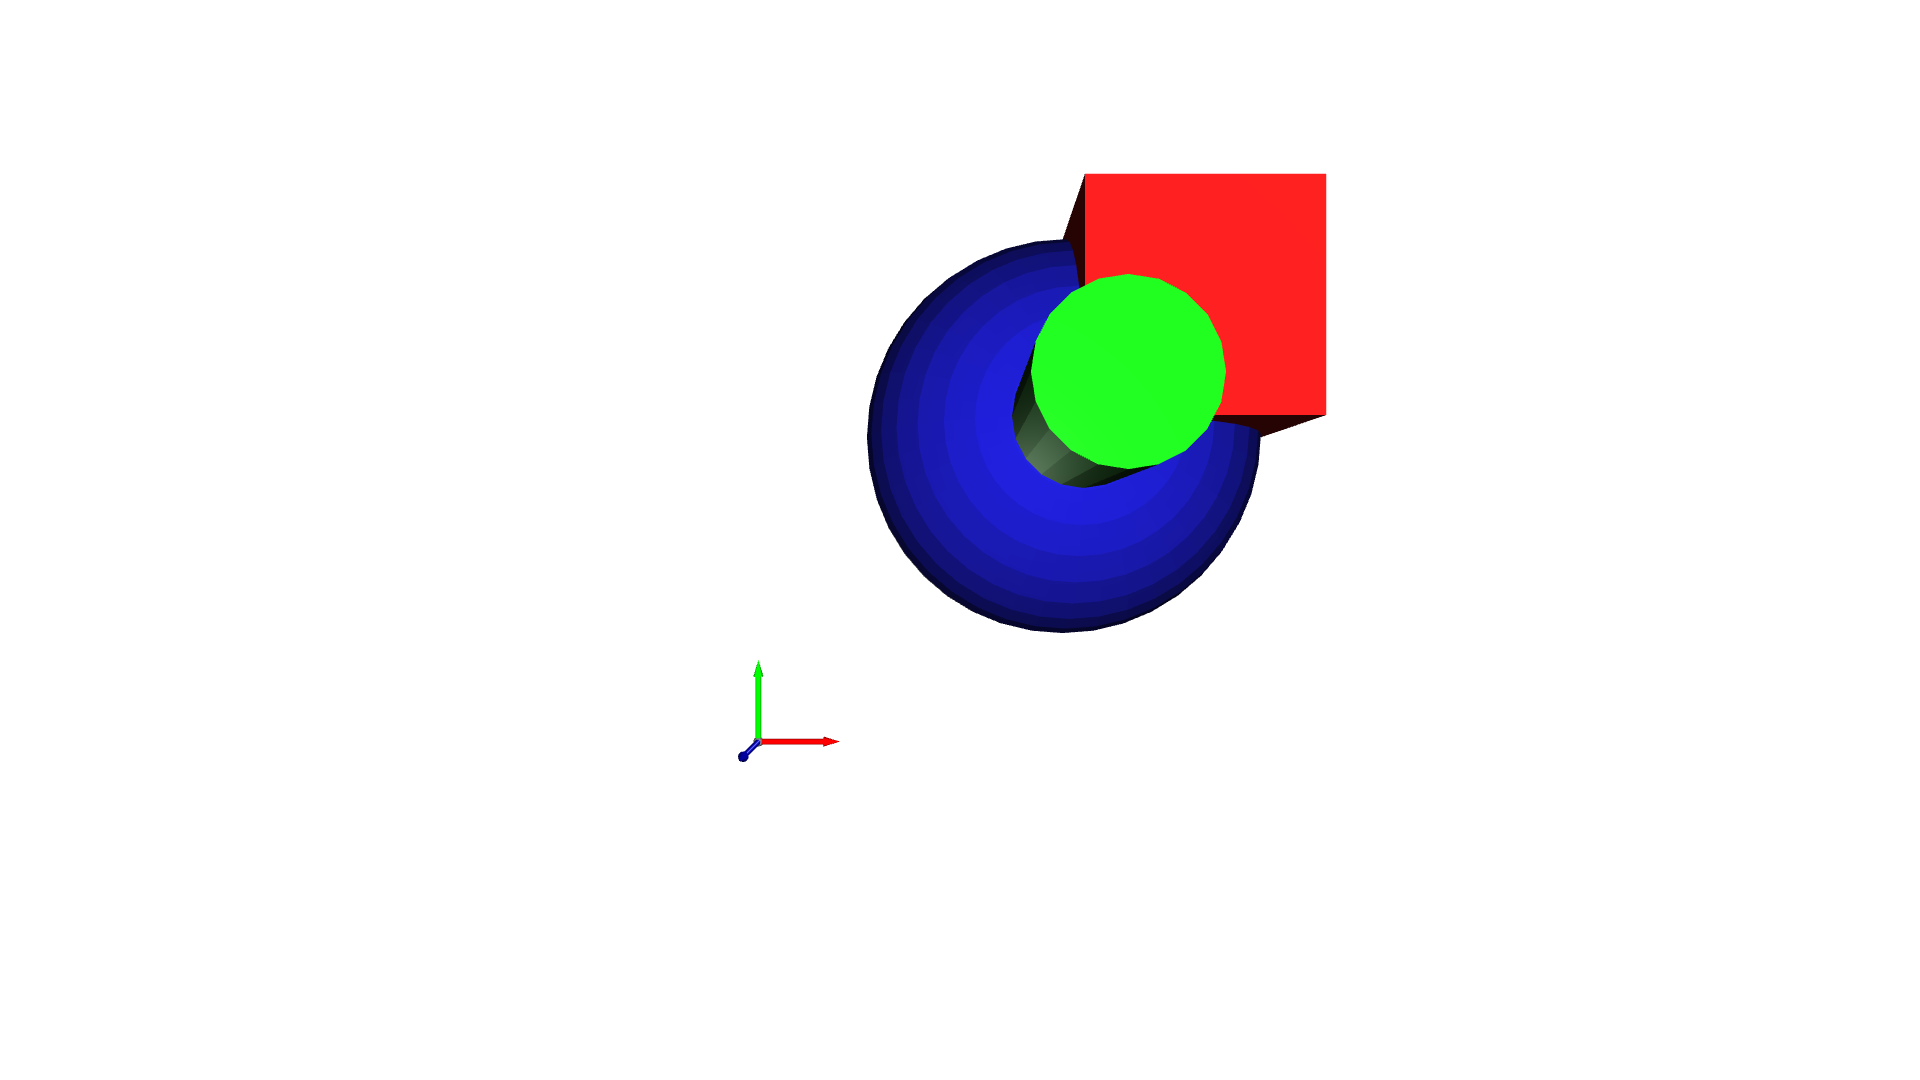

In [4]:
print("We draw a few primitives using collection.")
o3d.visualization.draw_geometries(
    [mesh_box, mesh_sphere, mesh_cylinder, mesh_frame])

print("We draw a few primitives using + operator of mesh.")
o3d.visualization.draw_geometries(
    [mesh_box + mesh_sphere + mesh_cylinder + mesh_frame])

## Draw line set
To draw lines, it is necessary to define a `LineSet` with a set of points and a set of edges (pairs of point indices). The example below creates custom points and edges (denoted as `lines`) to make a box. Color is optional - red color `[1,0,0]` is assigned to each edge in this example.

Let's draw a box using o3d.geometry.LineSet.


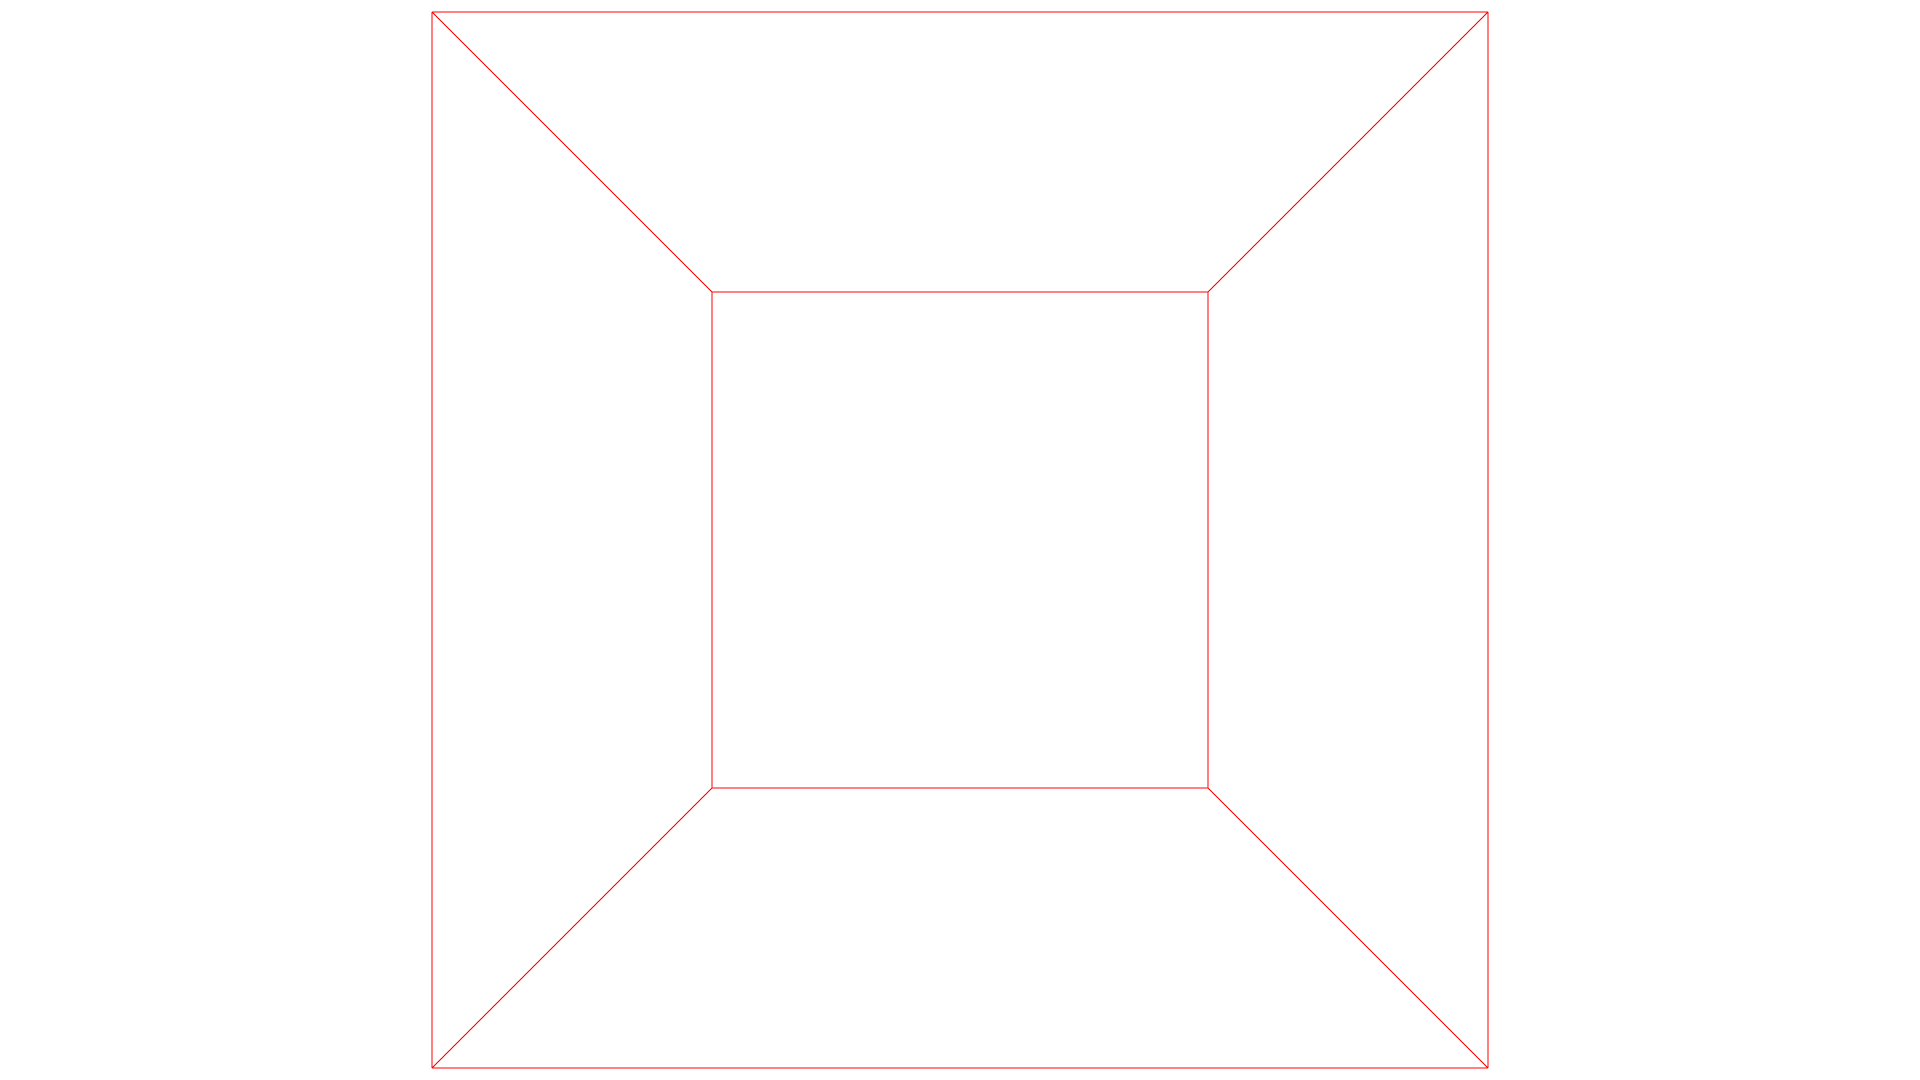

In [5]:
print("Let's draw a box using o3d.geometry.LineSet.")
points = [
    [0, 0, 0],
    [1, 0, 0],
    [0, 1, 0],
    [1, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [0, 1, 1],
    [1, 1, 1],
]
lines = [
    [0, 1],
    [0, 2],
    [1, 3],
    [2, 3],
    [4, 5],
    [4, 6],
    [5, 7],
    [6, 7],
    [0, 4],
    [1, 5],
    [2, 6],
    [3, 7],
]
colors = [[1, 0, 0] for i in range(len(lines))]
line_set = o3d.geometry.LineSet(
    points=o3d.utility.Vector3dVector(points),
    lines=o3d.utility.Vector2iVector(lines),
)
line_set.colors = o3d.utility.Vector3dVector(colors)
o3d.visualization.draw_geometries([line_set], zoom=0.8)